In [3]:
import pandas as pd

In [4]:
room_entries = pd.read_csv(''/DB/room_entries.csv')

In [5]:
room_entries.head(10)

,timestamp,user,room,room_name
0,1517115600,4f1897100d843738adf0f86c0510cffe,d4aaab942cbbe0e5b7726c6107f11608,Aubrielle's Kansas City Royals Room
1,1517115600,9fce3905a9bd5cd02297092a2f3894e8,ebe5843f5d3d9d23dc3024cc3e6188f5,Jude's Room
2,1517115601,c8adb30f27f1f2c1638c6b2f1075b344,210d8d1b60ae0d76c8740ebdda1f0375,Walter's Indianapolis Colts Room
3,1517115601,c0394190e82e6ef469bc1bf896d780bb,3c2cd82f285b0f1d33307d9dd72511d1,Ezekiel's Finding Nemo Room
4,1517115601,a7afb0757f3d05a844d2840927ba3d86,98dbfe778189fd55c116aa9b91166f57,Jude's St. Louis Cardinals Room
5,1517115603,43e9bf46e500316066bee4b69db85ee1,cfad11a52dbc7e230f710f2f58270883,Jude's Room
6,1517115603,8078c10d1b71a6746ce2c601b3624340,37c5acbcbb954ea7985180a84b4b72b3,Dorian's National League Room
7,1517115603,b54b6814fe3deff54704f16e17a75be3,5f2b1a8cd11c073bcfb8a9350aa2a898,Karter's Furious 7 Room
8,1517115603,b54b6814fe3deff54704f16e17a75be3,ca538f1c2e7d2daaa0e70cf77d3363ca,Alma's Carolina Panthers Room
9,1517115604,ff9a7cca11235bc89abeef1d06e4b0c6,d8dd0fd2bb02c64ae7a4896f3a35fa6b,Yaretzi's Pirates of the Caribbean: At World's...


In [43]:
import datetime
room_entries['datetime'] = [datetime.datetime.fromtimestamp(i) for i in room_entries['timestamp']]

In [7]:
room_entries['datetime'].head(10)

0   2018-01-28 00:00:00
1   2018-01-28 00:00:00
2   2018-01-28 00:00:01
3   2018-01-28 00:00:01
4   2018-01-28 00:00:01
5   2018-01-28 00:00:03
6   2018-01-28 00:00:03
7   2018-01-28 00:00:03
8   2018-01-28 00:00:03
9   2018-01-28 00:00:04
Name: datetime, dtype: datetime64[ns]

In [8]:
print(max(room_entries['datetime']))
print(min(room_entries['datetime']))

2018-01-28 23:59:59
2018-01-28 00:00:00


In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
room_entries.to_sql('room_entries', con=engine)

In [11]:
room_most_people = engine.execute("SELECT T1.room_name, T1.user_count FROM (select room_name, count(distinct user) as user_count from room_entries group by room_name) T1 ORDER BY user_count DESC LIMIT 1").fetchall()

In [12]:
print(room_most_people)

[("Emilio's Room", 1017)]


In [14]:
mean_room_entries_per_user = engine.execute("SELECT avg(room_count) FROM (select count(room) as room_count, user from room_entries group by user)").fetchall()
print(mean_room_entries_per_user)

[(6.8900150526843955,)]


In [15]:
user_went_atleast_three_rooms = engine.execute("SELECT count(distinct user) FROM (select count(distinct room) as room_count, user from room_entries group by user) T1 WHERE room_count>=3").fetchall()
print(user_went_atleast_three_rooms)

[(9947,)]


In [16]:
rooms_2user_12hours = engine.execute("SELECT count(*) FROM (SELECT room, Count(distinct strftime('%H', datetime(timestamp, 'unixepoch'))) as hour_count, count(user) as user_count FROM room_entries GROUP BY room HAVING count(user)>=2 AND Count(distinct strftime('%H', datetime(timestamp, 'unixepoch')))>=12) T1").fetchall()
print(rooms_2user_12hours)

[(256,)]


In [17]:
avg_roomEntries_per_hour = engine.execute("select strftime('%H', datetime(timestamp, 'unixepoch')) as hour,count(*) as entries_count from room_entries group by strftime('%H', datetime(timestamp, 'unixepoch'))").fetchall()
print(avg_roomEntries_per_hour)

[('00', 14092), ('01', 15573), ('02', 15207), ('03', 14411), ('04', 16018), ('05', 14579), ('06', 16383), ('07', 18563), ('08', 20202), ('09', 22975), ('10', 17847), ('11', 12382), ('12', 7811), ('13', 4869), ('14', 3545), ('15', 2977), ('16', 2285), ('17', 2549), ('18', 3544), ('19', 5473), ('20', 8211), ('21', 9585), ('22', 12320), ('23', 13235)]


In [19]:
type(avg_roomEntries_per_hour)

list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


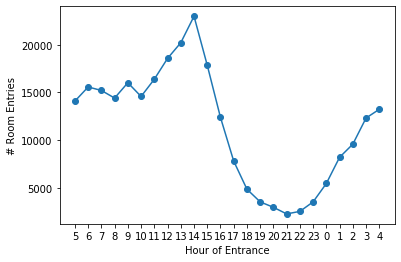

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.DataFrame({'x': [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in avg_roomEntries_per_hour], 'y': [i[1] for i in avg_roomEntries_per_hour] })
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
plt.xlabel("Hour of Entrance")
plt.ylabel("# Room Entries")
plt.show()

In [101]:
avg_distinct_users_per_hour = engine.execute("select strftime('%H', datetime(timestamp, 'unixepoch')) as hour, count(*) as count, count(distinct user) as user_count from room_entries group by strftime('%H', datetime(timestamp, 'unixepoch'))").fetchall()
print(avg_distinct_users_per_hour)

[('00', 14092, 4194), ('01', 15573, 4386), ('02', 15207, 4290), ('03', 14411, 4304), ('04', 16018, 4620), ('05', 14579, 4324), ('06', 16383, 4704), ('07', 18563, 5213), ('08', 20202, 5422), ('09', 22975, 6539), ('10', 17847, 5071), ('11', 12382, 3548), ('12', 7811, 2315), ('13', 4869, 1456), ('14', 3545, 1057), ('15', 2977, 823), ('16', 2285, 765), ('17', 2549, 900), ('18', 3544, 1169), ('19', 5473, 1754), ('20', 8211, 2452), ('21', 9585, 3079), ('22', 12320, 3610), ('23', 13235, 3941)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


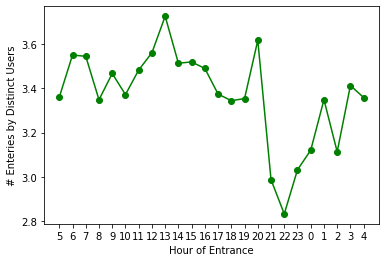

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.DataFrame({'x': [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in avg_distinct_users_per_hour], 'y': [i[1]/i[2] for i in avg_distinct_users_per_hour] })
plt.plot( 'x', 'y', data=df1, c='g', linestyle='-', marker='o')
plt.xlabel("Hour of Entrance")
plt.ylabel("# Enteries by Distinct Users")
plt.show()

In [98]:
rooms_entered_per_hour = engine.execute("select strftime('%H', datetime(timestamp, 'unixepoch')) as hour, count(*) as enteries, count(distinct room) as rooms_count from room_entries group by strftime('%H', datetime(timestamp, 'unixepoch'))").fetchall()
print(rooms_entered_per_hour)

[('00', 14092, 3997), ('01', 15573, 4113), ('02', 15207, 4137), ('03', 14411, 4022), ('04', 16018, 4413), ('05', 14579, 4024), ('06', 16383, 4384), ('07', 18563, 4746), ('08', 20202, 4994), ('09', 22975, 6345), ('10', 17847, 4769), ('11', 12382, 3390), ('12', 7811, 2320), ('13', 4869, 1499), ('14', 3545, 1220), ('15', 2977, 1000), ('16', 2285, 880), ('17', 2549, 1001), ('18', 3544, 1330), ('19', 5473, 2040), ('20', 8211, 2568), ('21', 9585, 3081), ('22', 12320, 3509), ('23', 13235, 3767)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


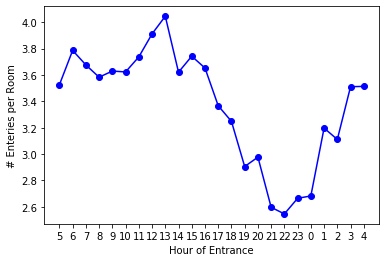

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

df2=pd.DataFrame({'x': [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in rooms_entered_per_hour], 'y': [i[1]/i[2] for i in rooms_entered_per_hour] })
plt.plot( 'x', 'y', data=df2, c='b', linestyle='-', marker='o')
plt.xlabel("Hour of Entrance")
plt.ylabel("# Enteries per Room")
plt.show()

In [104]:
uniq_user_per_uniq_room = engine.execute("select strftime('%H', datetime(timestamp, 'unixepoch')) as hour, count(distinct user) as user_count, count(distinct room) as room_count, count(*) from room_entries group by strftime('%H', datetime(timestamp, 'unixepoch'))").fetchall()
print(uniq_user_per_uniq_room)

[('00', 4194, 3997, 14092), ('01', 4386, 4113, 15573), ('02', 4290, 4137, 15207), ('03', 4304, 4022, 14411), ('04', 4620, 4413, 16018), ('05', 4324, 4024, 14579), ('06', 4704, 4384, 16383), ('07', 5213, 4746, 18563), ('08', 5422, 4994, 20202), ('09', 6539, 6345, 22975), ('10', 5071, 4769, 17847), ('11', 3548, 3390, 12382), ('12', 2315, 2320, 7811), ('13', 1456, 1499, 4869), ('14', 1057, 1220, 3545), ('15', 823, 1000, 2977), ('16', 765, 880, 2285), ('17', 900, 1001, 2549), ('18', 1169, 1330, 3544), ('19', 1754, 2040, 5473), ('20', 2452, 2568, 8211), ('21', 3079, 3081, 9585), ('22', 3610, 3509, 12320), ('23', 3941, 3767, 13235)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


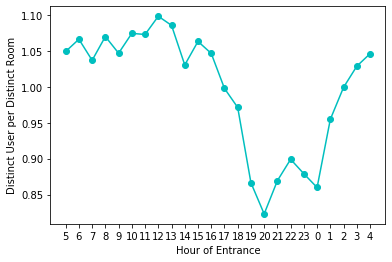

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

df4=pd.DataFrame({'x': [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in uniq_user_per_uniq_room], 'y': [i[1]/i[2] for i in uniq_user_per_uniq_room] })
plt.plot( 'x', 'y', data=df4, c='c', linestyle='-', marker='o')
plt.xlabel("Hour of Entrance")
plt.ylabel("Distinct User per Distinct Room")
plt.show()

In [30]:
avg_users_per_room = engine.execute("select strftime('%H', datetime(timestamp, 'unixepoch')) as hour, round(count(user)/count(room)*100,2) as entries_count from room_entries group by strftime('%H', datetime(timestamp, 'unixepoch'))").fetchall()
print(avg_users_per_room)

[('00', 100.0), ('01', 100.0), ('02', 100.0), ('03', 100.0), ('04', 100.0), ('05', 100.0), ('06', 100.0), ('07', 100.0), ('08', 100.0), ('09', 100.0), ('10', 100.0), ('11', 100.0), ('12', 100.0), ('13', 100.0), ('14', 100.0), ('15', 100.0), ('16', 100.0), ('17', 100.0), ('18', 100.0), ('19', 100.0), ('20', 100.0), ('21', 100.0), ('22', 100.0), ('23', 100.0)]


In [65]:
from sklearn.linear_model import LinearRegression

In [90]:
hours = [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in avg_roomEntries_per_hour]
X={}
X['5am-12noon'] = [1 if int(i)>=5 and int(i)<12 else 0 for i in hours]
X['12noon-5pm'] = [1 if int(i)>=12 and int(i)<17 else 0 for i in hours]
X['5pm-12midnight'] = [1 if int(i)>=17 and int(i)<24 else 0 for i in hours]
X['12midnight-5am'] = [1 if int(i)>=0 and int(i)<5 else 0 for i in hours]
X=pd.DataFrame(data=X)
y = [i[1] for i in avg_roomEntries_per_hour]
reg = LinearRegression().fit(X, y)
print(reg.coef_)

[ 3360.67142857  6574.04285714 -7879.75714286 -2054.95714286]


In [81]:
hours = [str(int(i[0])+5) if int(i[0])+5<24 else str(int(i[0])+5-24) for i in avg_roomEntries_per_hour]
X={}
X['AM'] = [1 if int(i)>=0 and int(i)<12 else 0 for i in hours]
X['PM'] = [1 if int(i)>=12 and int(i)<24 else 0 for i in hours]
X=pd.DataFrame(data=X)
y = [i[1] for i in avg_roomEntries_per_hour]
reg = LinearRegression().fit(X, y)
print(reg.coef_)

[ 1480.75 -1480.75]
